In [1]:
import sys
sys.path.append('./lib')
from audio_sine_model import AudioSineModel
#from sine_model_plotter import SineModelPlotter
asm = AudioSineModel('./audioa.wav')

/home/arthur/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [2]:
asm = AudioSineModel('./audioa.wav')
asm2 = AudioSineModel('./audioa-c2eq1.wav')
asmb = AudioSineModel('./audiob.wav')
asm.sine_model_analysis()
asm2.sine_model_analysis()
asmb.sine_model_analysis()


In [44]:
#smp = SineModelPlotter([asm2, asm])
#smp.plot('test')

import sys, os, time
import numpy as np
import matplotlib.pyplot as plt
import IPython
from IPython.core.debugger import set_trace

class SineModelPlotter:
  def __init__(self, audio_sine_models,max_plot_freq=10000):
    self.audio_sine_models = audio_sine_models
    self.max_plot_freq=max_plot_freq
    first_audio = self.audio_sine_models[0]
    self.sample_rate = first_audio.sample_rate
    self.maxplotbin = int(first_audio.fft_size*max_plot_freq/self.sample_rate)
    self.num_frames = int(first_audio.stft_magnitudes[:,0].size)
    self.frame_time = first_audio.hop_size*np.arange(self.num_frames)/float(self.sample_rate)
    self.bin_freq = np.arange(self.maxplotbin+1)*float(self.sample_rate)/first_audio.fft_size


  def plot(self, title, max_plot_freq=5000.0):

    plt.figure(1, figsize=(16.5, 5))
    #plt.pcolormesh(frame_time, bin_freq, np.transpose(mX[:,:maxplotbin+1]))
    colors = [(0, 0, 1, 0.5), (1, 0, 0, 0.5)]
    idx = 0
    for audio_sine_model in self.audio_sine_models:
        tracks = audio_sine_model.frequencies*np.less(audio_sine_model.frequencies, self.max_plot_freq)
        tracks[tracks<=0] = np.nan
        plt.plot(self.frame_time[0:tracks.shape[0]], tracks, color=colors[idx], lw=1.5)
        l =  np.array(audio_sine_model.lines)
        plt.plot(l[:,0], l[:,2], 'g^', color=colors[idx])
        idx = idx+1

    #plt.axis([0, self.frame_time, 0, max_plot_freq])
    plt.autoscale(tight=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()


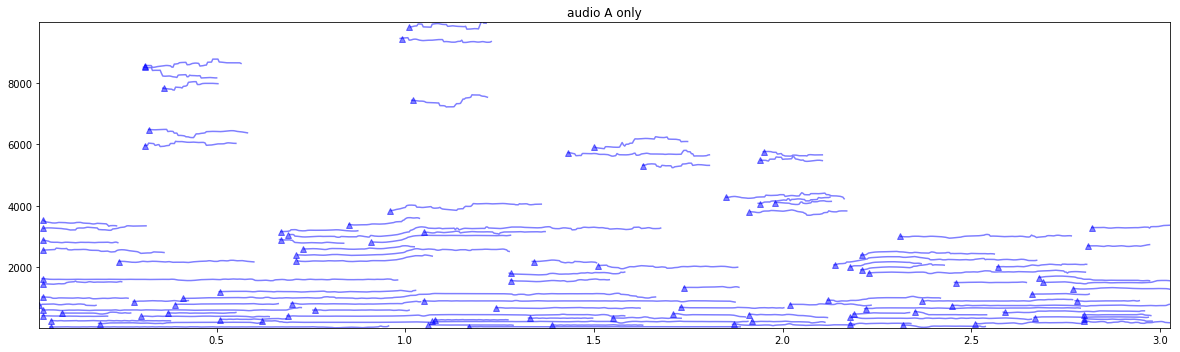

In [53]:
smp = SineModelPlotter([asm])
smp.plot('audio A only')

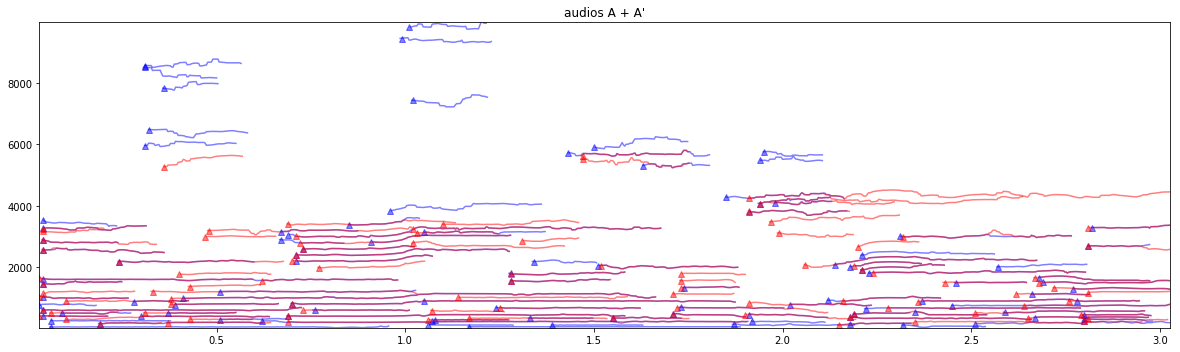

In [55]:
smp = SineModelPlotter([asm, asm2])
smp.plot("audios A + A'")

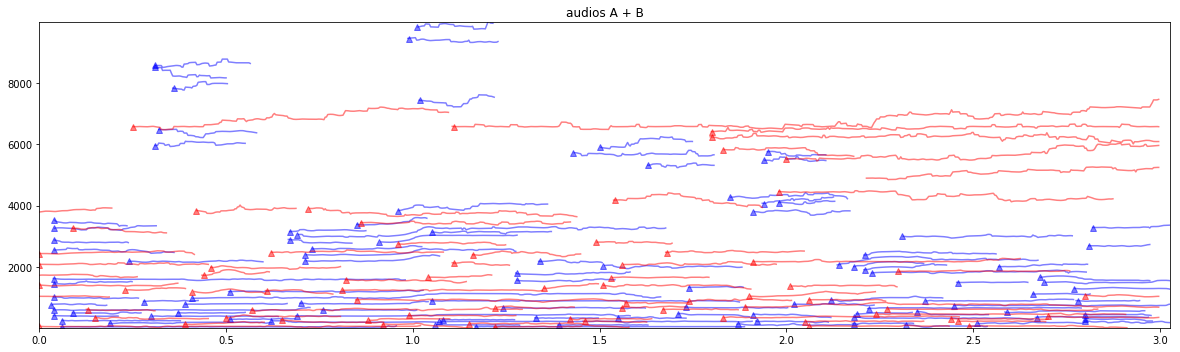

In [56]:
smp = SineModelPlotter([asm, asmb])
smp.plot('audios A + B')

In [50]:
asm.lines

[[0.03, 0.18, 760.0, 750.0, -66.66666666666667],
 [0.04, 0.21, 410.0, 400.0, -58.82352941176471],
 [0.04, 0.24, 2870.0, 2790.0, -400.00000000000006],
 [0.04, 0.24, 3520.0, 3340.0, -900.0000000000001],
 [0.04, 0.25, 1450.0, 1520.0, 333.33333333333337],
 [0.04, 0.27, 1020.0, 980.0, -173.91304347826087],
 [0.04, 0.32, 3260.0, 3340.0, 285.71428571428567],
 [0.04, 0.36, 2550.0, 2470.0, -250.0],
 [0.04, 0.73, 610.0, 670.0, 86.95652173913044],
 [0.04, 0.98, 1620.0, 1580.0, -42.5531914893617],
 [0.06, 0.38, 250.0, 240.0, -31.25],
 [0.06, 0.96, 40.0, 80.0, 44.44444444444445],
 [0.09, 0.28, 500.0, 500.0, 0.0],
 [0.19, 0.63, 160.0, 180.0, 45.45454545454545],
 [0.24, 0.6, 2180.0, 2160.0, -55.55555555555556],
 [0.28, 0.43, 870.0, 900.0, 200.00000000000006],
 [0.3, 0.64, 390.0, 380.0, -29.41176470588235],
 [0.31, 0.5, 8510.0, 8160.0, -1842.1052631578948],
 [0.31, 0.55, 5950.0, 6030.0, 333.33333333333326],
 [0.31, 0.57, 8570.0, 8630.0, 230.7692307692308],
 [0.32, 0.59, 6480.0, 6370.0, -407.4074074074

In [51]:
asm2.lines

[[0.03, 0.21, 390.0, 400.0, 55.55555555555556],
 [0.03, 0.27, 1040.0, 990.0, -208.33333333333331],
 [0.03, 0.6, 1640.0, 1600.0, -70.17543859649123],
 [0.04, 0.2, 3250.0, 3260.0, 62.5],
 [0.04, 0.25, 1450.0, 1520.0, 333.33333333333337],
 [0.04, 0.29, 1140.0, 1210.0, 280.00000000000006],
 [0.04, 0.32, 3180.0, 3340.0, 571.4285714285713],
 [0.04, 0.34, 2890.0, 2740.0, -499.99999999999994],
 [0.04, 0.36, 2570.0, 2470.0, -312.5],
 [0.04, 0.73, 600.0, 680.0, 115.94202898550725],
 [0.06, 0.24, 500.0, 540.0, 222.22222222222223],
 [0.1, 0.43, 880.0, 900.0, 60.606060606060616],
 [0.1, 0.64, 300.0, 380.0, 148.14814814814815],
 [0.19, 0.36, 150.0, 190.0, 235.29411764705884],
 [0.24, 0.68, 2180.0, 2180.0, 0.0],
 [0.31, 0.55, 500.0, 520.0, 83.33333333333331],
 [0.33, 1.03, 1200.0, 1130.0, -100.0],
 [0.36, 0.57, 5270.0, 5610.0, 1619.0476190476193],
 [0.37, 0.65, 190.0, 190.0, 0.0],
 [0.38, 0.67, 790.0, 800.0, 34.48275862068965],
 [0.38, 1.67, 970.0, 1020.0, 38.75968992248062],
 [0.4, 0.65, 1760.0, 176

In [59]:
(290-310)

-20